# K-Neighbors : mon implémentation pour bien comprendre

## Importation de modules et création de la donnée

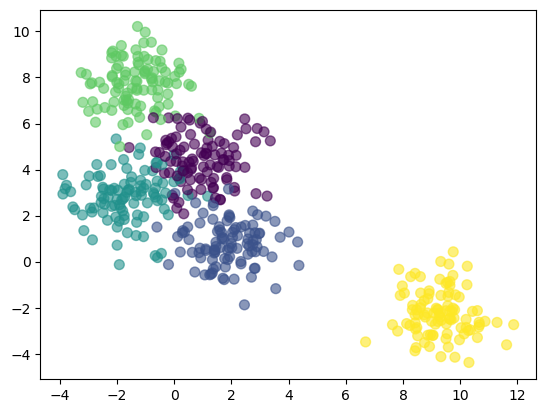

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings

warnings.filterwarnings('ignore')

X, Y = make_blobs(n_samples=500, centers=5, random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="viridis", alpha=0.6)

## On entraîne le modèle de sk-learn pour un benchmark de précision

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.888

## Mon implémentation avec commentaires

In [71]:
class KNeighbors:
    
    def __init__(self, X, Y, n_neighbors=3):
        # On enregistre les données classifiées utilisées ensuite pour classifier
        self.X = X
        self.Y = Y
        self.n_neighbors = n_neighbors
        
    def predict(self, X_input):
        # Result contiendra nos prédictions
        result = []
        # Counter sert uniqument à la visualisation
        counter = 0
        
        # On parcourt les données qu'on nous demande de prédire
        for row in X_input:
            # Pour chaque sample, on réinitialise points. En première colonne, ce tableau a les indices des neighbors
            # actuellement les meilleurs. En deuxième colonne, la distance pour pouvoir comparer et remplacer si besoin
            points = np.ones((self.n_neighbors, 2), dtype=np.float64) * 1_000_000
            
            # On parcourt les données dont on connaît la classification
            for j in range(self.X.shape[0]):
                # On calcule la distance entre le point à classifier (row) et le point déjà classifié (self.X[j])
                distance = np.sqrt(np.power(row - self.X[j], 2).sum())
                
                # Points est classé par ordre décroissant en fonction de la distance.
                # Si la plus grande distance du tableau est supérieure à la distance actuelle, on remplace le point
                if distance < points[-1, -1]:
                    points[-1, 0] = j
                    points[-1, -1] = distance
                    # On retrie notre tableau en fonction des distances de manière décroissante
                    points = points[points[:, 1].argsort()]
                    
            # La boucle terminée, on garde uniquement les index de points, pas les distances
            points = points[:, 0].astype(int)
            # On "vote" en utilisant les plus proches voisins pour trouver la classe
            result.append(np.argmax(np.bincount(self.Y[points])))
            
            # Utile UNIQUEMENT pour la visualisation. On visualise un point et ses plus proches voisins selon l'algo
            if counter == 27:
                plt.scatter(X_train[:, 0], X_train[:, 1], color="b", alpha=0.5, label="Donnée classifiée")
                plt.scatter(X_test[counter, 0], X_test[counter, 1], color="g", s=50, marker="D", label="Un point à classifier")
                plt.scatter(X_train[points, 0], X_train[points, 1], color="r", marker="x", label="Les 8 K-Neighbors")
                plt.title("Implémentation de KNeighbors")
                plt.legend()
            counter += 1
        # On renvoie nos prédictions de classe sous forme de tableau numpy
        return np.array(result)

## On calcule la précision et grâce au code dans l'implémentation de classe, on obtient une visualisation

0.888

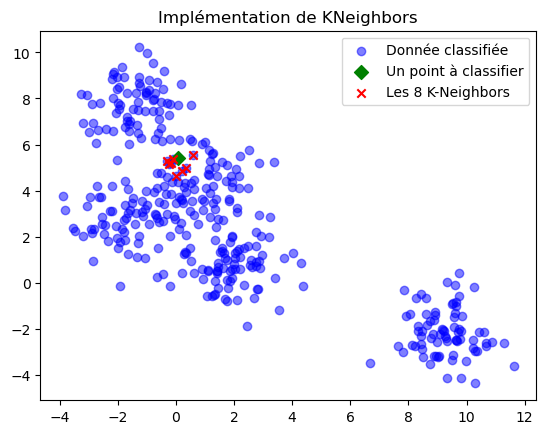

In [72]:
my_model = KNeighbors(X_train, Y_train, n_neighbors=8)
predicted = my_model.predict(X_test)
((predicted == Y_test).sum() / predicted.shape[0])

# Précision identique à sk-learn, et la visualisation montre bien le fonctionnement du modèle